# This is our project on Curriculum recomendation system , First We are going to import some python library And Load the dataset, Then Perform Exploratory Data Analysis


# Load Libraries

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from tqdm import tqdm


Load the dataset fron google drive in google colab

# Read Data

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Here We are going to laod the All the dataset cleanly and Performing Exploratory Data Analysis.


In [ ]:

path="/content/drive/MyDrive/learning-equality-curriculum-recommendations/"
topics  =pd.read_csv(path+"topics.csv")
content =pd.read_csv(path+"content.csv")
corr =pd.read_csv(path+"correlations.csv")
sub=pd.read_csv(path+"sample_submission.csv")

# content.head()
print(content['language'])
# print(topics.describe())
# topics.head()


0         es
1         it
2         es
3         pt
4         es
          ..
154042    en
154043    it
154044    pt
154045    en
154046    en
Name: language, Length: 154047, dtype: object


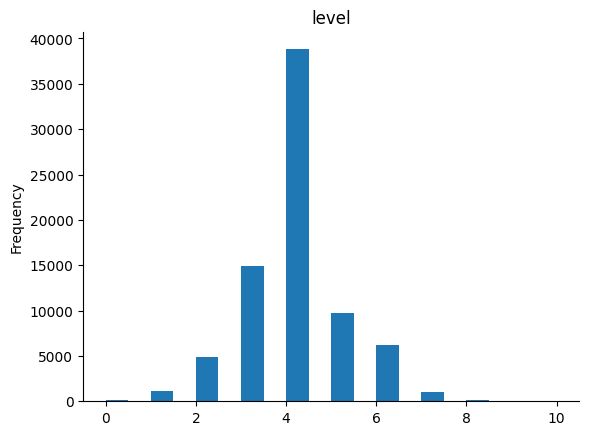

In [ ]:
# @title level

from matplotlib import pyplot as plt
topics['level'].plot(kind='hist', bins=20, title='level')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
content.columns = ["content_"+ column for column in content.columns]

corr["content_ids"] = corr["content_ids"].str.split()
corr = corr.rename(columns = {"content_ids":"true_content"})
corr.head()

,topic_id,true_content
0,t_00004da3a1b2,"[c_1108dd0c7a5d, c_376c5a8eb028, c_5bc0e1e2cba..."
1,t_00068291e9a4,"[c_639ea2ef9c95, c_89ce9367be10, c_ac1672cdcd2..."
2,t_00069b63a70a,[c_11a1dc0bfb99]
3,t_0006d41a73a8,"[c_0c6473c3480d, c_1c57a1316568, c_5e375cf14c4..."
4,t_0008768bdee6,"[c_34e1424229b4, c_7d1a964d66d5, c_aab93ee667f4]"


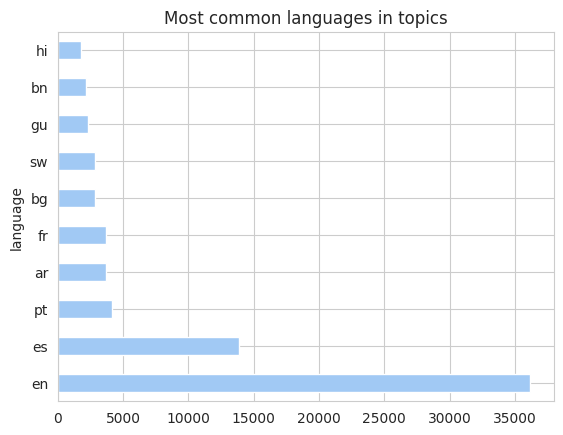

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


sns.set_style('whitegrid')
sns.set_palette('pastel')
topics.language.value_counts().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Most common languages in topics')
plt.show()
plt.figure(figsize=(8, 6))

In [ ]:
#Top languages of topics
topics.language.value_counts().sort_values(ascending=False).head(10)


language
en    36161
es    13910
pt     4177
ar     3701
fr     3701
bg     2867
sw     2860
gu     2320
bn     2176
hi     1786
Name: count, dtype: int64

Here We can clearly see that english (en) **is** the most commonly used language in the topics dataframe and second is spanish language(es)

In [ ]:
#Top languages of contents

sns.set_style('whitegrid')
sns.set_palette('deep')
content.language.value_counts().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Most common languages in contents')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'language'

From the above graph We can see English is the most common language used in  content data and second is spanish

Important thing to note here is that for both contents and topics, we can use mutlilingual models or focus on only english for our analysis. Furthermore, prediction of content ids can be done only if the language
of both the content id and topic id is the same.

In [ ]:
content.language.value_counts().sort_values(ascending=False).head(10)

language
en    65939
es    30844
fr    10682
pt    10435
ar     7418
bg     6050
hi     4042
zh     3849
gu     3677
bn     2513
Name: count, dtype: int64

In [ ]:
print(topics.head())
print(topics.shape)

               id                                              title  \
0  t_00004da3a1b2                         Откриването на резисторите   
1  t_000095e03056             Unit 3.3 Enlargements and Similarities   
2  t_00068291e9a4                    Entradas e saídas de uma função   
3  t_00069b63a70a                                        Transcripts   
4  t_0006d41a73a8  Графики на експоненциални функции (Алгебра 2 н...   

                                         description channel category  level  \
0  Изследване на материали, които предизвикват на...  000cf7   source      4   
1                                                NaN  b3f329  aligned      2   
2               Entenda um pouco mais sobre funções.  8e286a   source      4   
3                                                NaN  6e3ba4   source      3   
4  Научи повече за графиките на сложните показате...  000cf7   source      4   

  language          parent  has_content  
0       bg  t_16e29365b50d         True  
1 

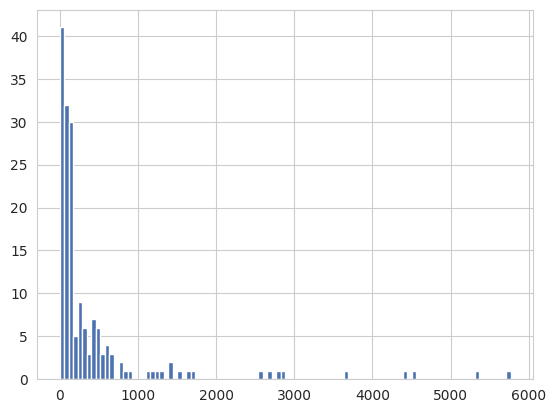

In [ ]:
#Sizes of different channels

plt.hist(topics.channel.value_counts(), bins=100)
plt.show()

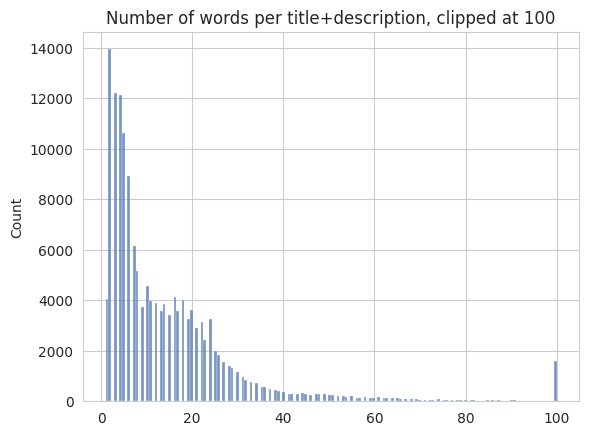

In [ ]:
texts = content['title'].fillna('') + ' ' + content['description'].fillna('')
title_desc_len = np.clip(texts.apply(lambda x: len(x.strip().split(' '))), 0, 100)

sns.histplot(title_desc_len)
plt.title('Number of words per title+description, clipped at 100')
plt.show()

The number of values less than 100 are quite a few, but the models can handle that. Also in many cases we do not have descriptions and only title is present even for that case we can depend on our model.

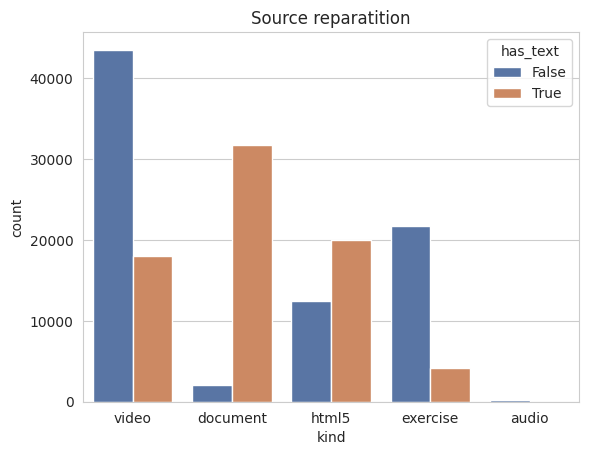

In [ ]:
content['has_text'] = ~content['text'].isna()
sns.set_style('whitegrid')
sns.set_palette('deep')
sns.countplot(x="kind", hue="has_text", data=content)
plt.title('Source reparatition')
plt.show()

Most of our text data is from documents, followed by videos.

In [ ]:
n_corrs = corr['content_ids'].apply(lambda x: len(x.split(' ')))

print('Total number of correlations :', n_corrs.sum())
print('Average number of correlations per topic :', np.round(n_corrs.mean(), 1))
print('Minimum number of correlations per topic :', n_corrs.min())
print('Maximum number of correlations per topic :', n_corrs.max())

Total number of correlations : 279919
Average number of correlations per topic : 4.6
Minimum number of correlations per topic : 1
Maximum number of correlations per topic : 293


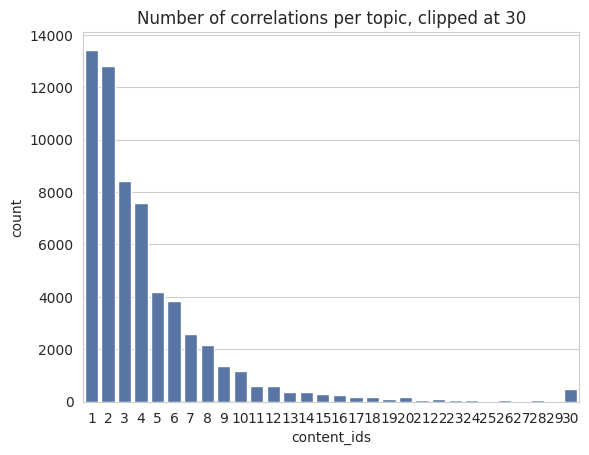

In [ ]:
sns.countplot(x=np.clip(n_corrs, 0, 30))
sns.set_style('whitegrid')
sns.set_palette('deep')
plt.title('Number of correlations per topic, clipped at 30')
plt.show()

In [ ]:
topics_val = topics[topics['category'] != "source"][["channel", "id"]]
topics_val = topics_val.merge(corr, left_on='id', right_on='topic_id')

channel_val = topics_val.groupby("channel").agg(list).reset_index()
channel_val['content_ids'] = channel_val['content_ids'].apply(lambda x: list(np.unique(np.concatenate([x_.split(' ') for x_ in x]))))

In [ ]:
def iou(a, b):
    return len(set(a).intersection(set(b))) / len(set(a + b))

In [ ]:
ious = np.zeros((len(channel_val), len(channel_val)))

for i in range(len(channel_val)):
    for j in range(i):
        iou_ij = iou(channel_val['content_ids'][i], channel_val['content_ids'][j])
        ious[i, j] = iou_ij
        ious[j, i] = iou_ij

## This script used simple joins based on parent_id and child_id for every channel and level to create the topic tree.

# Create Topic Trees

In [ ]:
df = pd.DataFrame()

for channel in tqdm(topics['channel'].unique()):
    channel_df = topics[(topics['channel'] == channel)].reset_index(drop = True)
    for level in sorted(channel_df.level.unique()):
        #For level 0, it first creates a topic tree column which is the title of that topic.
        if level == 0:
            topic_tree = channel_df[channel_df['level'] == level]['title'].astype(str)
            topic_tree_df = pd.DataFrame([channel_df[channel_df['level'] == level]['id'], topic_tree.values]).T
            topic_tree_df.columns = ['child_id','topic_tree']
            channel_df = channel_df.merge(topic_tree_df, left_on = 'id', right_on = 'child_id', how = 'left').drop(['child_id'], axis = 1)

        #Once the topic tree column has been created, the parent node and child node is merged on parent_id = child_id
        topic_df_parent = channel_df[channel_df['level'] == level][['id','title','parent','topic_tree']]
        topic_df_parent.columns = 'parent_' + topic_df_parent.columns

        topic_df_child = channel_df[channel_df['level'] == level + 1][['id','title','parent','topic_tree']]
        topic_df_child.columns = 'child_' + topic_df_child.columns

        topic_df_merged = topic_df_parent.merge(topic_df_child, left_on = 'parent_id', right_on = 'child_parent')[['child_id','parent_id','parent_title','child_title','parent_topic_tree']]

        #Topic tree is parent topic tree + title of the current child on that level
        topic_tree = topic_df_merged['parent_topic_tree'].astype(str) + ' > ' + topic_df_merged['child_title'].astype(str)

        topic_tree_df = pd.DataFrame([topic_df_merged['child_id'].values,topic_tree.values]).T
        topic_tree_df.columns = ['child_id','topic_tree']

        channel_df = channel_df.merge(topic_tree_df, left_on = 'id', right_on = 'child_id', how = 'left').drop(['child_id'], axis = 1)
        if 'topic_tree_y' in list(channel_df.columns):
            channel_df['topic_tree'] = channel_df['topic_tree_x'].combine_first(channel_df['topic_tree_y'])
            channel_df = channel_df.drop(['topic_tree_x','topic_tree_y'], axis = 1)

    df = pd.concat([df,channel_df])

100%|██████████| 171/171 [00:12<00:00, 13.29it/s]


# Visualize CBSE Tree

In [ ]:


from collections import defaultdict
from pprint import pprint

# Assuming 'df' is your DataFrame containing the data
list_trees = list(df[df['channel'] == 'ef2088']['topic_tree'].values)

# Initialize a defaultdict to store the tree structure
tree_dict = defaultdict(dict)

# Iterate over each path in the list of trees
for path in list_trees:
    # Convert the path to a string to ensure it can be split
    path = str(path)

    # Split the path into individual nodes
    nodes = path.split(' > ')

    # Initialize 'current' as the root of the tree
    current = tree_dict

    # Traverse each node in the path and build the tree
    for node in nodes:
        # Ensure each node is added to the tree structure
        current = current.setdefault(node, {})

# Print the tree structure
pprint(tree_dict)


defaultdict(<class 'dict'>,
            {'nan': {'CBSE Content - Final': {'CBSE 10': {'Biology': {'Control and Coordination': {'Endocrine Glands': {},
                                                                                                   'Movement in Plants': {},
                                                                                                   'Nerve Impulse and Reflex action': {},
                                                                                                   'Neurons': {}},
                                                                      'Heredity and Evolution': {'Darwin-s Theory of Natural Selection': {},
                                                                                                 'Evidences and Stages of Evolution': {},
                                                                                                 'Fossils': {},
                                                                                

In [ ]:
from graphviz import Digraph
from IPython.display import display, Image

def show_topic_tree(topic_id: str, topics: pd.DataFrame):

    # make id_title
    topics["id_title"] = topics["id"].astype(str) + "-" + topics["title"].astype(str)

    # make parent_id_title
    id_id_title_dict = dict(zip(topics["id"], topics["id_title"]))
    topics["parent_id_title"] = topics["parent"].map(id_id_title_dict)

    # get input_id_title
    input_id_title = topics.loc[topics["id"] == topic_id, "id_title"].values[0]

    # make edge
    edges = []

    def get_child_edge(parent_topic_id_title: str, topics: pd.DataFrame, edges: list) -> list:
        topic_id_title_list = topics[topics["parent_id_title"] == parent_topic_id_title]["id_title"].tolist()
        if topic_id_title_list:
            for topic_id_title in topic_id_title_list:
                edges.append((parent_topic_id_title, topic_id_title))
                get_child_edge(parent_topic_id_title = topic_id_title, topics = topics, edges = edges)
        return edges

    get_edge = get_child_edge(parent_topic_id_title = input_id_title, topics = topics, edges = edges)

    # render
    G = Digraph(format="png")
    G.attr("node", shape="circle")

    for i,j in edges:
        G.edge(str(i), str(j))
    G.render("/working/tree")
    img = Image('/working/tree.png')
    display(img)

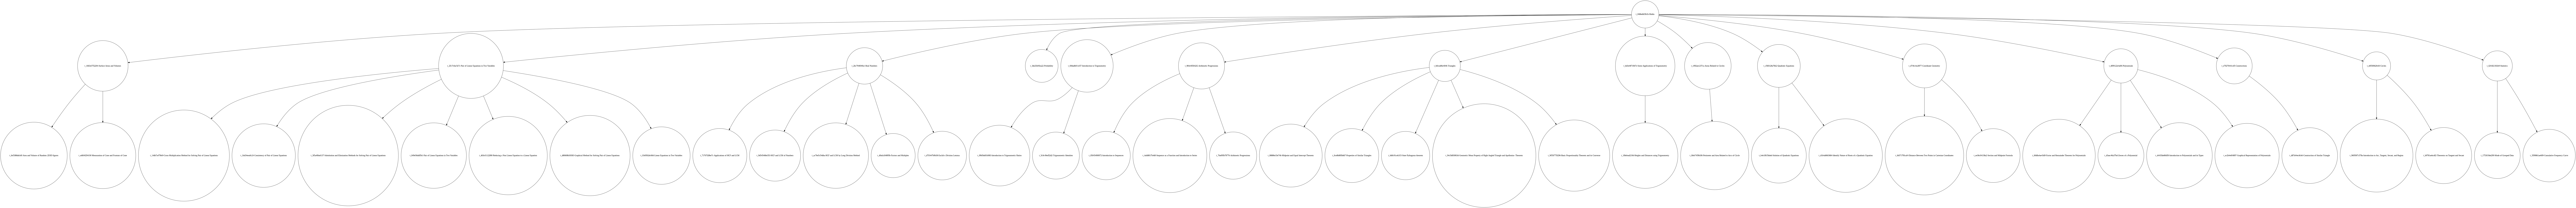

In [ ]:
show_topic_tree(topic_id="t_f468edbf3b1b",topics=topics)